This code cell ensures that you are running the correct version of the required packages for this project. If you have created the venv as described in the instructions you should only have to run this cell once when you first set up the application.

In [ ]:
!pip install pandas
!pip install pillow
!pip install image 
!pip install torch==2.2.2
!pip install torchvision==0.17.2
!pip install numpy==1.26.4
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.4 MB/s eta 0:00:0000:0100:01


### GPU test
Run the following cell to ensure you have a GPU avaliable. You may run on the CPU but will be much slower.

In [8]:
import torch
if torch.cuda.is_available():
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


### Evironment test
The following file will load a pretrained model to test that your environment is set up correctly. 

In [ ]:
import pandas as pd
import numpy as np

model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

Using cache found in /home/nels/.cache/torch/hub/pytorch_vision_v0.10.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [2]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)


In [3]:
from torchvision import transforms

In [4]:
from PIL import Image
import numpy as np

input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocesss = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
])

input_tensor = preprocesss(input_image)
input_batch = input_tensor.unsqueeze(0)  # create a mini-batch as expected by the model

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]  # get the output from the model
output_predictions = output.argmax(0)  # get the predicted class for each pixel

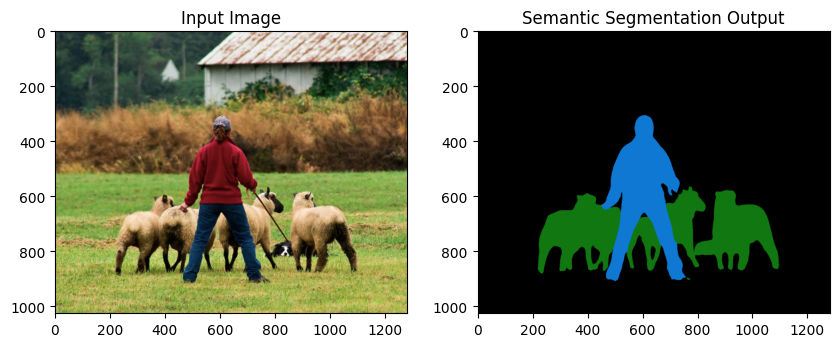

In [13]:

palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Input Image")
plt.subplot(1, 2, 2)
plt.imshow(r)
plt.title("Semantic Segmentation Output")
plt.show()